#Importing libraries and cleaned_df_Eg dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
warnings.filterwarnings("ignore")
df=pd.read_csv('cleaned_df_Eg.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,perovskite,BG,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.6,0.01,0.39,0.60,1.0,0.0,2.975,0.025
1,Cs0.01MA0.99PbBr0.03I2.97,1.6,0.01,0.00,0.99,1.0,0.0,2.970,0.030


#Heatmap

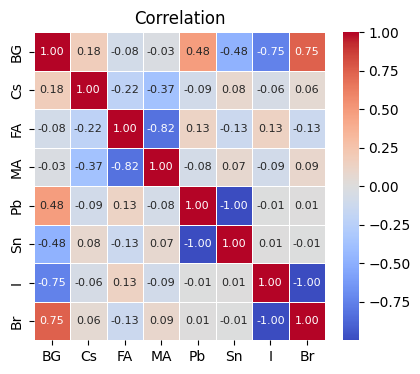

In [ ]:
df1=df.iloc[:,1:]
corr_matrix = df1.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(4.7, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,  annot_kws={"size": 8})
plt.title('Correlation')
plt.savefig('Correlation.png')
plt.show()

#Data Prep

In [ ]:
dfx=df.iloc[:,2:]
X=dfx.values
y=df.iloc[:,1].values
y=y.reshape(len(y),1)
dfx

,Cs,FA,MA,Pb,Sn,I,Br
0,0.010,0.390,0.60,1.0,0.0,2.975,0.025
1,0.010,0.000,0.99,1.0,0.0,2.970,0.030
2,0.025,0.475,0.50,0.5,0.5,3.000,0.000
3,0.025,0.825,0.15,1.0,0.0,2.550,0.450
4,0.020,0.380,0.60,1.0,0.0,2.975,0.025
...,...,...,...,...,...,...,...
546,0.000,0.000,1.00,0.0,1.0,0.360,2.640
547,0.000,0.000,1.00,0.0,1.0,1.000,2.000
548,0.000,0.000,1.00,0.0,1.0,0.000,3.000
549,0.000,0.000,1.00,0.0,1.0,2.000,1.000


#Ensemble Learning

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=100)
rf=RandomForestRegressor()
rf.fit(X_train1,y_train1)

# Calculate cross-validated RMSE
mse_scores1 = cross_val_score(estimator=rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)
print("RMSE: {:.4f}".format(rmse_scores1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores1.std()))

RMSE: 0.0831
Standard Deviation: 0.0154


In [ ]:
#RF on Test set
y_pred1=rf.predict(X_test1)
y_pred1=y_pred1.reshape(len(y_pred1),1)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred1))
print("R value:", r_value1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R2 on Test Set: 0.8730434109216492
R value: 0.9411660887578746
MAE on Test Set: 0.0463830057372348
MSE on Test Set: 0.004944448664486005
RMSE on Test Set: 0.07031677370646355


In [ ]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train1, y_train_pred1))
print("R value:", r_value_p1)
print("MAE on Train Set:", mean_absolute_error(y_train1, y_train_pred1))
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R2 on Train Set: 0.9792242385674456
R value: 0.9897467219097646
MAE on Train Set: 0.01850221230158737
MSE on Train Set: 0.0010858637410605357
RMSE on Train Set: 0.03295244666273713


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[1.37 1.48]
 [1.72 1.72]
 [1.54 1.65]
 [1.24 1.3 ]
 [1.69 1.62]
 [1.54 1.62]
 [1.73 1.73]
 [1.53 1.52]
 [1.85 1.92]
 [1.6  1.6 ]
 [1.72 1.72]
 [1.6  1.53]
 [1.9  1.96]
 [1.6  1.6 ]
 [1.34 1.38]
 [1.81 1.9 ]
 [1.54 1.56]
 [1.98 1.6 ]
 [1.59 1.65]
 [1.57 1.57]
 [1.57 1.56]
 [1.33 1.31]
 [1.64 1.6 ]
 [1.32 1.39]
 [1.32 1.4 ]
 [1.7  1.61]
 [1.8  1.7 ]
 [1.57 1.59]
 [1.79 1.78]
 [1.63 1.65]
 [1.32 1.42]
 [1.63 1.63]
 [1.53 1.35]
 [1.54 1.5 ]
 [1.59 1.62]
 [1.29 1.32]
 [1.32 1.4 ]
 [1.54 1.54]
 [1.55 1.59]
 [1.57 1.55]
 [1.56 1.62]
 [1.41 1.44]
 [1.62 1.73]
 [1.95 1.97]
 [1.59 1.6 ]
 [1.61 1.62]
 [1.52 1.52]
 [1.56 1.58]
 [1.39 1.43]
 [1.6  1.6 ]
 [1.56 1.6 ]
 [1.53 1.61]
 [1.24 1.2 ]
 [1.64 1.67]
 [1.62 1.63]
 [1.63 1.59]
 [1.59 1.62]
 [1.72 1.69]
 [1.7  1.71]
 [1.58 1.65]
 [1.58 1.62]
 [1.59 1.59]
 [1.25 1.28]
 [2.34 2.35]
 [1.74 1.72]
 [1.87 1.93]
 [2.   1.97]
 [1.66 1.84]
 [1.63 1.66]
 [1.62 1.57]
 [1.41 1.45]
 [1.6  1.61]
 [1.58 1.55]
 [1.35 1.26]
 [2.28 2.28]
 [1.73 1.71]
 [1.54 1.58]

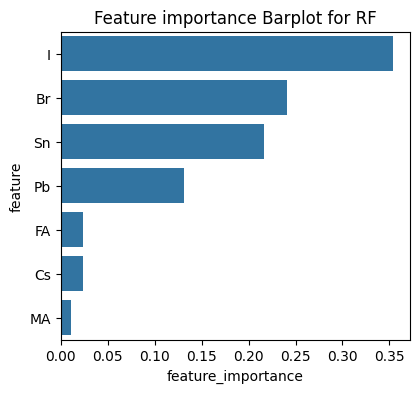

In [ ]:
feature_importance = rf.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('Feature importance Barplot for RF')
plt.savefig('Feature importance Barplot for RF.png')

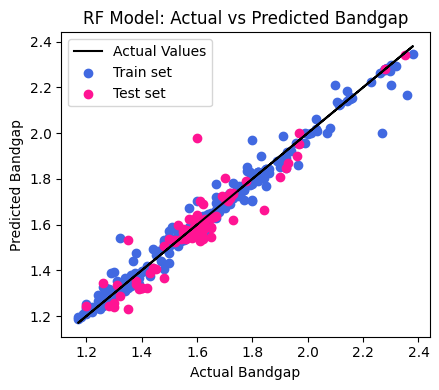

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred1, color='royalblue', label='Train set')
plt.scatter(y_test1, y_pred1, color='deeppink', label='Test set')

plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.legend()
#plt.grid(True)
plt.title('RF Model: Actual vs Predicted Bandgap')
#plt.savefig('RF Model: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15,  random_state=100)
gbr=GradientBoostingRegressor()
gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE: {:.4f}".format(rmse_scores2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores2.std()))

RMSE: 0.0800
Standard Deviation: 0.0088


In [ ]:
#GBR on test set
y_pred2=gbr.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R2 on Test Set: 0.8658079215514228
R value: 0.9375385428645829
MAE on Test Set: 0.0492835641689506
MSE on Test Set: 0.00522624188225621
RMSE on Test Set: 0.07229275124281971


In [ ]:
#GBR on train set
y_train_pred2 = gbr.predict(X_train2)
y_train_pred2=y_train_pred2.reshape(len(y_train_pred2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_train2, y_train_pred2))
print("R value:", r_value_p2)
print("MAE on Test Set:", mean_absolute_error(y_train2, y_train_pred2))
print("MSE on Test Set:", mean_squared_error(y_train2, y_train_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred2)))

R2 on Test Set: 0.9649319038327434
R value: 0.9823971823130334
MAE on Test Set: 0.029467834685606546
MSE on Test Set: 0.0018328653907423095
RMSE on Test Set: 0.04281197718795886


In [ ]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[1.4  1.48]
 [1.71 1.72]
 [1.59 1.65]
 [1.23 1.3 ]
 [1.69 1.62]
 [1.56 1.62]
 [1.76 1.73]
 [1.56 1.52]
 [1.86 1.92]
 [1.6  1.6 ]
 [1.75 1.72]
 [1.59 1.53]
 [1.88 1.96]
 [1.59 1.6 ]
 [1.37 1.38]
 [1.8  1.9 ]
 [1.56 1.56]
 [2.   1.6 ]
 [1.59 1.65]
 [1.59 1.57]
 [1.66 1.56]
 [1.33 1.31]
 [1.61 1.6 ]
 [1.3  1.39]
 [1.31 1.4 ]
 [1.73 1.61]
 [1.78 1.7 ]
 [1.56 1.59]
 [1.77 1.78]
 [1.61 1.65]
 [1.33 1.42]
 [1.61 1.63]
 [1.52 1.35]
 [1.56 1.5 ]
 [1.59 1.62]
 [1.3  1.32]
 [1.31 1.4 ]
 [1.52 1.54]
 [1.56 1.59]
 [1.56 1.55]
 [1.56 1.62]
 [1.36 1.44]
 [1.61 1.73]
 [1.94 1.97]
 [1.59 1.6 ]
 [1.64 1.62]
 [1.51 1.52]
 [1.57 1.58]
 [1.37 1.43]
 [1.59 1.6 ]
 [1.58 1.6 ]
 [1.58 1.61]
 [1.24 1.2 ]
 [1.62 1.67]
 [1.61 1.63]
 [1.61 1.59]
 [1.59 1.62]
 [1.72 1.69]
 [1.72 1.71]
 [1.59 1.65]
 [1.56 1.62]
 [1.6  1.59]
 [1.25 1.28]
 [2.37 2.35]
 [1.76 1.72]
 [1.87 1.93]
 [2.   1.97]
 [1.68 1.84]
 [1.62 1.66]
 [1.62 1.57]
 [1.38 1.45]
 [1.59 1.61]
 [1.56 1.55]
 [1.34 1.26]
 [2.24 2.28]
 [1.72 1.71]
 [1.57 1.58]

Text(0.5, 1.0, 'Feature importance Barplot for GBR')

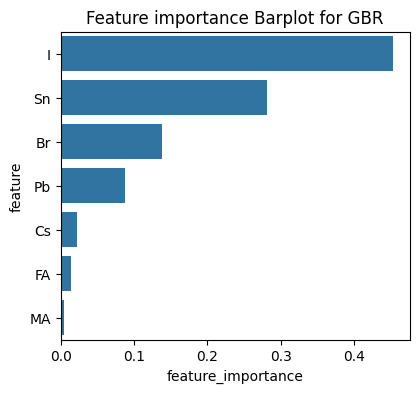

In [ ]:
feature_importance = gbr.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('Feature importance Barplot for GBR')
plt.savefig('Feature importance Barplot for GBR.png')

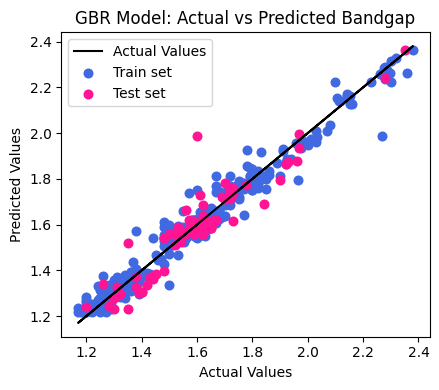

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test2, y_pred2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)
plt.title('GBR Model: Actual vs Predicted Bandgap')
plt.savefig('GBR Model: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

##XGBoost

In [ ]:
import xgboost as xgb
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=100)
xgb = xgb.XGBRegressor()
xgb.fit(X_train3,y_train3)

mse_scores3 = cross_val_score(estimator = xgb, X = X_train3, y = y_train3, cv = 5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE: {:.4f}".format(rmse_scores3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores3.std()))

RMSE: 0.0935
Standard Deviation: 0.0151


In [ ]:
#XGB on Test set
y_pred3=xgb.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R2 on Test Set: 0.8151748542948862
R value: 0.9151628302789189
MAE on Test Set: 0.05277163133276513
RMSE on Test Set: 0.08484218444413083


In [ ]:
#XGB on Train set
y_train_pred3 = xgb.predict(X_train3)

y_train_pred3=y_train_pred3.reshape(len(y_train_pred3),1)
r_value_p3 = np.corrcoef(y_train3.squeeze(), y_train_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred3)))

R2 on Train Set: 0.9969977667095755
R value: 0.9985007504428786
MAE on Train Set: 0.0057804135726048375
MSE on Train Set: 0.00015691440637976347
RMSE on Train Set: 0.012526548063204144


In [ ]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[1.41 1.48]
 [1.72 1.72]
 [1.55 1.65]
 [1.23 1.3 ]
 [1.72 1.62]
 [1.55 1.62]
 [1.74 1.73]
 [1.54 1.52]
 [1.92 1.92]
 [1.59 1.6 ]
 [1.71 1.72]
 [1.6  1.53]
 [1.91 1.96]
 [1.6  1.6 ]
 [1.3  1.38]
 [1.7  1.9 ]
 [1.56 1.56]
 [2.1  1.6 ]
 [1.6  1.65]
 [1.56 1.57]
 [1.54 1.56]
 [1.34 1.31]
 [1.65 1.6 ]
 [1.34 1.39]
 [1.36 1.4 ]
 [1.65 1.61]
 [1.79 1.7 ]
 [1.58 1.59]
 [1.83 1.78]
 [1.63 1.65]
 [1.29 1.42]
 [1.63 1.63]
 [1.52 1.35]
 [1.52 1.5 ]
 [1.61 1.62]
 [1.28 1.32]
 [1.36 1.4 ]
 [1.52 1.54]
 [1.52 1.59]
 [1.59 1.55]
 [1.56 1.62]
 [1.38 1.44]
 [1.61 1.73]
 [1.95 1.97]
 [1.59 1.6 ]
 [1.67 1.62]
 [1.51 1.52]
 [1.61 1.58]
 [1.39 1.43]
 [1.6  1.6 ]
 [1.54 1.6 ]
 [1.5  1.61]
 [1.24 1.2 ]
 [1.63 1.67]
 [1.66 1.63]
 [1.62 1.59]
 [1.58 1.62]
 [1.74 1.69]
 [1.72 1.71]
 [1.55 1.65]
 [1.59 1.62]
 [1.58 1.59]
 [1.26 1.28]
 [2.34 2.35]
 [1.74 1.72]
 [1.89 1.93]
 [1.95 1.97]
 [1.62 1.84]
 [1.6  1.66]
 [1.62 1.57]
 [1.37 1.45]
 [1.6  1.61]
 [1.59 1.55]
 [1.43 1.26]
 [2.28 2.28]
 [1.72 1.71]
 [1.53 1.58]

Text(0.5, 1.0, 'Feature importance Barplot for XGB')

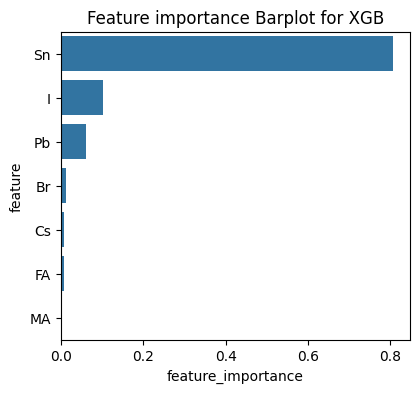

In [ ]:
feature_importance = xgb.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('Feature importance Barplot for XGB')
plt.savefig('Feature importance Barplot for XGB.png')

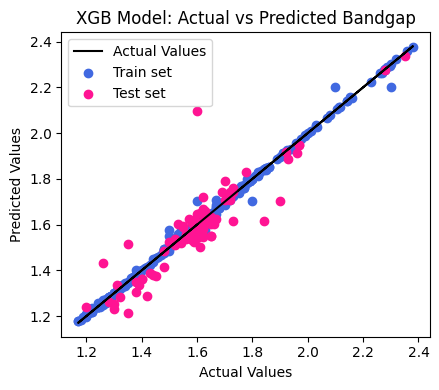

In [ ]:
y_train_pred3 = xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred3, color='royalblue', label='Train set')
plt.scatter(y_test3, y_pred3, color='deeppink', label='Test set')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)
plt.title('XGB Model: Actual vs Predicted Bandgap')
plt.savefig('XGB Model: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

##CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=100)
catboost = CatBoostRegressor()
catboost.fit(X_train4, y_train4, verbose=0)

# Evaluating with cross-validation
mse_scores4 = cross_val_score(estimator = catboost, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE: {:.4f}".format(rmse_scores4.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores4.std()))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.1945197	total: 16.2ms	remaining: 2.3s
7:	learn: 0.1899308	total: 17.6ms	remaining: 2.19s
8:	learn: 0.1859241	total: 18.9ms	remaining: 2.09s
9:	learn: 0.1819474	total: 20.8ms	remaining: 2.06s
10:	learn: 0.1780474	total: 22.5ms	remaining: 2.02s
11:	learn: 0.1745939	total: 24.5ms	remaining: 2.02s
12:	learn: 0.1708623	total: 26.3ms	remaining: 1.99s
13:	learn: 0.1668756	total: 28ms	remaining: 1.97s
14:	learn: 0.1637656	total: 29.9ms	remaining: 1.96s
15:	learn: 0.1603498	total: 31.6ms	remaining: 1.94s
16:	learn: 0.1570606	total: 33.5ms	remaining: 1.94s
17:	learn: 0.1541692	total: 35.2ms	remaining: 1.92s
18:	learn: 0.1509175	total: 41.4ms	remaining: 2.13s
19:	learn: 0.1481403	total: 43.5ms	remaining: 2.13s
20:	learn: 0.1451003	total: 45.2ms	remaining: 2.11s
21:	learn: 0.1422597	total: 46.3ms	remaining: 2.06s
22:	learn: 0.1396909	total: 48.2ms	remaining: 2.05s
23:	learn: 0.1372606	total: 49.9ms	remaining: 2.03s
24:	learn: 0.1344794

In [ ]:
#CB on Test set
y_pred4 = catboost.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R2 on Test Set: 0.9127121983627065
R value: 0.9592570655351725
MAE on Test Set: 0.04196177290501265
MSE on Test Set: 0.0033995088979988366
RMSE on Test Set: 0.05830530763145699


In [ ]:
#CB on Train set
y_train_pred4 = catboost.predict(X_train4)

y_train_pred4=y_train_pred4.reshape(len(y_train_pred4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred4)))

R2 on Train Set: 0.9843254218578168
R value: 0.9921875843990032
MAE on Train Set: 0.020021952066378225
MSE on Train Set: 0.0008192458368503701
RMSE on Train Set: 0.02862247083761935


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[1.44 1.48]
 [1.7  1.72]
 [1.59 1.65]
 [1.23 1.3 ]
 [1.68 1.62]
 [1.57 1.62]
 [1.75 1.73]
 [1.54 1.52]
 [1.9  1.92]
 [1.59 1.6 ]
 [1.74 1.72]
 [1.6  1.53]
 [1.9  1.96]
 [1.6  1.6 ]
 [1.33 1.38]
 [1.71 1.9 ]
 [1.57 1.56]
 [1.77 1.6 ]
 [1.61 1.65]
 [1.55 1.57]
 [1.54 1.56]
 [1.32 1.31]
 [1.62 1.6 ]
 [1.32 1.39]
 [1.34 1.4 ]
 [1.71 1.61]
 [1.8  1.7 ]
 [1.58 1.59]
 [1.78 1.78]
 [1.63 1.65]
 [1.33 1.42]
 [1.62 1.63]
 [1.52 1.35]
 [1.56 1.5 ]
 [1.59 1.62]
 [1.29 1.32]
 [1.34 1.4 ]
 [1.52 1.54]
 [1.53 1.59]
 [1.58 1.55]
 [1.55 1.62]
 [1.41 1.44]
 [1.62 1.73]
 [1.94 1.97]
 [1.58 1.6 ]
 [1.62 1.62]
 [1.52 1.52]
 [1.56 1.58]
 [1.37 1.43]
 [1.6  1.6 ]
 [1.57 1.6 ]
 [1.53 1.61]
 [1.25 1.2 ]
 [1.64 1.67]
 [1.63 1.63]
 [1.61 1.59]
 [1.6  1.62]
 [1.7  1.69]
 [1.71 1.71]
 [1.59 1.65]
 [1.56 1.62]
 [1.59 1.59]
 [1.26 1.28]
 [2.36 2.35]
 [1.74 1.72]
 [1.89 1.93]
 [2.03 1.97]
 [1.7  1.84]
 [1.67 1.66]
 [1.62 1.57]
 [1.41 1.45]
 [1.6  1.61]
 [1.56 1.55]
 [1.36 1.26]
 [2.27 2.28]
 [1.7  1.71]
 [1.55 1.58]

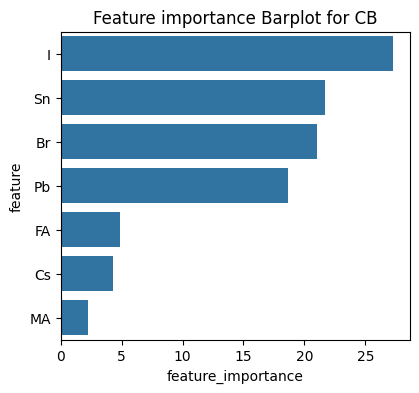

In [ ]:
feature_importance = catboost.get_feature_importance()
feature_names = list(dfx.columns)
num_features = len(feature_names)
dic = {'feature': feature_names, 'feature_importance': feature_importance}

# Create a DataFrame with the feature importances
df_fi = pd.DataFrame(dic)
df_fi = df_fi.sort_values('feature_importance', ascending=False).reset_index(drop=True)

# Plot the top 30 feature importances
plt.figure(figsize=(4.5, 4))
sns.barplot(data=df_fi.head(30), x='feature_importance', y='feature')
plt.title('Feature importance Barplot for CB')
plt.savefig('Feature importance Barplot for CB.png')
plt.show()


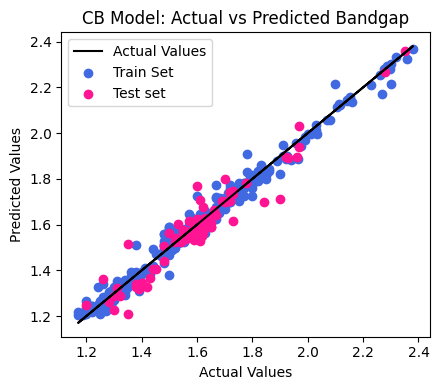

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred4, color='royalblue', label='Train Set')
plt.scatter(y_test4, y_pred4, color='deeppink', label='Test set')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)
plt.title('CB Model: Actual vs Predicted Bandgap')
plt.savefig('CB Model: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

#Hyperparameter tuning using Optuna

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00


##Tuning of RF

In [ ]:
import optuna
def objective1(trial):
    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])

    # Create the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train1, y_train1, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse

# Create the Optuna study and optimize the objective function
study1 = optuna.create_study(direction='minimize')
study1.optimize(objective1, n_trials=100)

[I 2024-08-30 08:10:35,640] A new study created in memory with name: no-name-928b9e03-7d43-4a5b-b270-15a77af98392
[I 2024-08-30 08:10:44,856] Trial 0 finished with value: 0.11187888680306188 and parameters: {'n_estimators': 425, 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 22, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.11187888680306188.
[I 2024-08-30 08:11:00,170] Trial 1 finished with value: 0.12483047505408829 and parameters: {'n_estimators': 1007, 'max_depth': 19, 'min_samples_split': 28, 'min_samples_leaf': 31, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.11187888680306188.
[I 2024-08-30 08:11:11,871] Trial 2 finished with value: 0.1085454112096207 and parameters: {'n_estimators': 734, 'max_depth': 30, 'min_samples_split': 31, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.1085454112096207.
[I 2024-08-30 08:11:31,341] Trial 3 finished with value: 0.12125735657525412 and parameters: {'n_estimators': 1366, 'max_d

In [ ]:
# Print the best hyperparameters and the best score
print('Best trial:', study1.best_trial.number)
print("Best hyperparameters: ", study1.best_params)
print("Best RMSE: ", study1.best_value)

Best trial: 89
Best hyperparameters:  {'n_estimators': 1650, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best RMSE:  0.0752413376363641


In [ ]:
# Train the model with the best hyperparameters
rf_params = {
    'n_estimators': 1650,
    'max_depth': 19,
    'min_samples_split': 4,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Initialize the Random Forest model with the defined hyperparameters
best_rf = RandomForestRegressor(**rf_params, random_state=100)
# Calculate cross-validated RMSE
mse_scores_c1 = cross_val_score(estimator=best_rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c1 = np.sqrt(-mse_scores_c1)
print("RMSE: {:.4f}".format(rmse_scores_c1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c1.std()))

RMSE: 0.0743
Standard Deviation: 0.0116


In [ ]:
best_rf.fit(X_train1,y_train1)

y_pred_n1=best_rf.predict(X_test1)
y_pred_n1=y_pred1.reshape(len(y_pred1),1)
r_value_n1 = np.corrcoef(y_test1.squeeze(), y_pred_n1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred_n1))
print("R value:", r_value_n1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred_n1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred_n1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred_n1)))

R2 on Test Set: 0.8730434109216492
R value: 0.9411660887578746
MAE on Test Set: 0.0463830057372348
MSE on Test Set: 0.004944448664486005
RMSE on Test Set: 0.07031677370646355


##Tuning for Gradient Boosting

In [ ]:
import optuna
def objective2(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Create the Gradient Boosting model
    model = GradientBoostingRegressor(**params, random_state=100)

    # Perform cross-validation
    score = cross_val_score(model, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize
study2 = optuna.create_study(direction='minimize')
study2.optimize(objective2, n_trials=100)

[I 2024-09-09 06:24:48,807] A new study created in memory with name: no-name-24c3b59c-5dc8-43af-add1-480186636836
[I 2024-09-09 06:24:50,197] Trial 0 finished with value: 0.07552078713178041 and parameters: {'n_estimators': 350, 'max_depth': 4, 'learning_rate': 0.048081417844822005, 'subsample': 0.7177697780241206, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.07552078713178041.
[I 2024-09-09 06:24:52,735] Trial 1 finished with value: 0.07769285252598411 and parameters: {'n_estimators': 741, 'max_depth': 3, 'learning_rate': 0.04477731564909042, 'subsample': 0.946617457829701, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.07552078713178041.
[I 2024-09-09 06:24:55,273] Trial 2 finished with value: 0.08115999293833451 and parameters: {'n_estimators': 534, 'max_depth': 8, 'learning_rate': 0.05925521638841254, 'subsample': 0.8094334248809818, 'min_samples_split': 2, 'min_samples_

In [ ]:
# Print the best hyperparameters and the best score
print('Best trial:', study2.best_trial.number)
print("Best hyperparameters: ", study2.best_params)
print("Best RMSE: ", study2.best_value)

Best trial: 96
Best hyperparameters:  {'n_estimators': 136, 'max_depth': 5, 'learning_rate': 0.04981483334160672, 'subsample': 0.5000218119589622, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2'}
Best RMSE:  0.07265482479383575


In [ ]:
gbr_params = {
    'n_estimators': 136,
    'max_depth': 5,
    'learning_rate': 0.04981483334160672,
    'subsample': 0.5000218119589622,
    'min_samples_split': 8,
    'min_samples_leaf': 4,
    'max_features': 'log2'
}
# Train the final model with the best hyperparameters
best_gbr = GradientBoostingRegressor(**gbr_params, random_state=100)
best_gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores_c2 = cross_val_score(estimator=best_gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c2 = np.sqrt(-mse_scores_c2)
print("RMSE: {:.4f}".format(rmse_scores_c2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c2.std()))

RMSE: 0.0718
Standard Deviation: 0.0114


In [ ]:
#TEST set
y_pred_n2=best_gbr.predict(X_test2)
y_pred_n2=y_pred_n2.reshape(len(y_pred_n2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred_n2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred_n2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred_n2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred_n2)))

R2 on Test Set: 0.8640403993199363
R value: 0.9361940390546395
MAE on Test Set: 0.04810455693597419
MSE on Test Set: 0.0052950797661373665
RMSE on Test Set: 0.07276729874151827


##Tuning of XGBoost

In [ ]:
from xgboost import XGBRegressor
def objective3(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5)
    }

    # Create the XGBoost model
    model = XGBRegressor(**params, random_state=100, use_label_encoder=False, eval_metric='rmse')

    # Perform cross-validation
    score = cross_val_score(model, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
study3 = optuna.create_study(direction='minimize')
study3.optimize(objective3, n_trials=100)

[I 2024-08-30 08:47:52,420] A new study created in memory with name: no-name-b87b378a-f838-4e0c-b617-b2d2d67d4b81
[I 2024-08-30 08:47:52,834] Trial 0 finished with value: 0.099533645652182 and parameters: {'n_estimators': 538, 'max_depth': 3, 'learning_rate': 0.12727999564576012, 'subsample': 0.9062057733051782, 'min_child_weight': 7, 'colsample_bytree': 0.9038788320490796, 'gamma': 0.48778593018254923}. Best is trial 0 with value: 0.099533645652182.
[I 2024-08-30 08:47:53,309] Trial 1 finished with value: 0.09616507326555085 and parameters: {'n_estimators': 641, 'max_depth': 5, 'learning_rate': 0.23948133069291522, 'subsample': 0.984884492708774, 'min_child_weight': 9, 'colsample_bytree': 0.9342628031230557, 'gamma': 0.4356753855137902}. Best is trial 1 with value: 0.09616507326555085.
[I 2024-08-30 08:47:53,858] Trial 2 finished with value: 0.1006778832622606 and parameters: {'n_estimators': 732, 'max_depth': 7, 'learning_rate': 0.016054562438866462, 'subsample': 0.8431825057828994, 

In [ ]:
# Print the best hyperparameters and the corresponding R2 score
print(f'Best trial: {study3.best_trial.number}')
print(f'Best value (R2): {study3.best_trial.value}')
print(f'Best hyperparameters: {study3.best_trial.params}')

Best trial: 81
Best value (R2): 0.07241308688838091
Best hyperparameters: {'n_estimators': 928, 'max_depth': 6, 'learning_rate': 0.22992662129285588, 'subsample': 0.8881869258301351, 'min_child_weight': 7, 'colsample_bytree': 0.5957157704701745, 'gamma': 0.011344956781114713}


In [ ]:
xgb_params = {
    'n_estimators': 928,
    'max_depth': 6,
    'learning_rate': 0.22992662129285588,
    'subsample': 0.8881869258301351,
    'colsample_bytree': 0.5957157704701745,
    'min_child_weight': 7,
    'gamma': 0.011344956781114713
}
# Train the final model with the best hyperparameters
best_xgb = XGBRegressor(**xgb_params, random_state=100)
best_xgb.fit(X_train3, y_train3)

# Evaluating with cross-validation
mse_scores = cross_val_score(best_xgb, X_train3, y_train3, cv=5,  scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

RMSE: 0.0716
Standard Deviation: 0.0107


In [ ]:
y_pred_n3=best_xgb.predict(X_test3)
y_pred_n3=y_pred_n3.reshape(len(y_pred_n3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred_n3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred_n3))
print("MSE on Test Set:", mean_squared_error(y_test3, y_pred_n3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred_n3)))

R2 on Test Set: 0.821367412509545
R value: 0.9160775177069636
MAE on Test Set: 0.05139395907988029
MSE on Test Set: 0.0069570210184661686
RMSE on Test Set: 0.0834087586435991


##Tuning of CatBoost

In [ ]:
import optuna
def objective4(trial):
    # Define the hyperparameters to be optimized
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50)
    }

    # Create the CatBoost model
    model = CatBoostRegressor(
        **params,
        logging_level='Silent',
        random_seed=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train4, y_train4, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize the objective function
study4 = optuna.create_study(direction='minimize')
study4.optimize(objective4, n_trials=100)

[I 2024-08-23 07:14:08,680] A new study created in memory with name: no-name-51ef5d11-a85f-42ba-9239-53d34b8b9995
[I 2024-08-23 07:14:39,166] Trial 0 finished with value: 0.08010585005174505 and parameters: {'iterations': 961, 'depth': 10, 'learning_rate': 0.03465330825359466, 'l2_leaf_reg': 0.004820325846063508, 'bagging_temperature': 0.2668513658641699, 'random_strength': 4.402051160223963, 'border_count': 115, 'od_type': 'Iter', 'od_wait': 35}. Best is trial 0 with value: 0.08010585005174505.
[I 2024-08-23 07:14:41,365] Trial 1 finished with value: 0.08014141766442716 and parameters: {'iterations': 428, 'depth': 5, 'learning_rate': 0.04507168745217358, 'l2_leaf_reg': 2.129816167598842e-05, 'bagging_temperature': 0.6291372769074334, 'random_strength': 2.381034754018855e-05, 'border_count': 63, 'od_type': 'Iter', 'od_wait': 21}. Best is trial 0 with value: 0.08010585005174505.
[I 2024-08-23 07:14:41,990] Trial 2 finished with value: 0.1955186566463386 and parameters: {'iterations': 11

In [ ]:
# Print the best hyperparameters and the best score
print(f'Best trial: {study4.best_trial.number}')
print("Best hyperparameters: ", study4.best_params)
#0.054 {'iterations': 447, 'depth': 7, 'learning_rate': 0.01160773886463643, 'l2_leaf_reg': 0.17646457712200744, 'bagging_temperature': 0.796219937369702, 'random_strength': 3.372120712870285, 'border_count': 110, 'od_type': 'IncToDec', 'od_wait': 20}
print("Best RMSE: ", study4.best_value)

Best trial: 88
Best hyperparameters:  {'iterations': 879, 'depth': 7, 'learning_rate': 0.009441202058832534, 'l2_leaf_reg': 0.00021623936147943695, 'bagging_temperature': 0.3293300520822168, 'random_strength': 9.62951386410631, 'border_count': 235, 'od_type': 'Iter', 'od_wait': 19}
Best RMSE:  0.07503445354851389


In [ ]:
# Train the model with the best hyperparameters
best_cb = CatBoostRegressor(
    iterations=447,
    depth=7,
    learning_rate=0.01160773886463643,
    l2_leaf_reg=0.17646457712200744,
    bagging_temperature=0.796219937369702,
    random_strength=3.372120712870285,
    border_count=110,
    od_type='IncToDec',
    od_wait=20,
    random_seed=100
)
best_cb.fit(X_train4, y_train4, verbose=0)

mse_scores = cross_val_score(estimator = best_cb, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

0:	learn: 0.2251333	total: 1.12ms	remaining: 501ms
1:	learn: 0.2232228	total: 3.22ms	remaining: 716ms
2:	learn: 0.2211582	total: 6.59ms	remaining: 975ms
3:	learn: 0.2193139	total: 9.64ms	remaining: 1.07s
4:	learn: 0.2171937	total: 13.3ms	remaining: 1.17s
5:	learn: 0.2151266	total: 15.1ms	remaining: 1.11s
6:	learn: 0.2131430	total: 16.4ms	remaining: 1.03s
7:	learn: 0.2113452	total: 17.8ms	remaining: 979ms
8:	learn: 0.2094871	total: 19.1ms	remaining: 932ms
9:	learn: 0.2078168	total: 20ms	remaining: 875ms
10:	learn: 0.2061303	total: 20.9ms	remaining: 827ms
11:	learn: 0.2043308	total: 22.2ms	remaining: 806ms
12:	learn: 0.2024734	total: 23.1ms	remaining: 773ms
13:	learn: 0.2007173	total: 24.1ms	remaining: 746ms
14:	learn: 0.1990433	total: 25.3ms	remaining: 730ms
15:	learn: 0.1973150	total: 26.4ms	remaining: 712ms
16:	learn: 0.1958169	total: 26.9ms	remaining: 679ms
17:	learn: 0.1940180	total: 28ms	remaining: 668ms
18:	learn: 0.1922852	total: 29.2ms	remaining: 658ms
19:	learn: 0.1905642	total

In [ ]:
y_pred_n4 = best_cb.predict(X_test4)
y_pred_n4 = y_pred_n4.reshape(len(y_pred_n4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred_n4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred_n4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred_n4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred_n4)))

R2 on Test Set: 0.9240769603021914
R value: 0.9634866900579305
MAE on Test Set: 0.040636359607477295
MSE on Test Set: 0.0029568971170600036
RMSE on Test Set: 0.054377358496528715


In [ ]:
print(np.concatenate((y_pred_n4.reshape(len(y_pred_n4),1), y_test4.reshape(len(y_test4),1)),1))

[[1.43 1.48]
 [1.69 1.72]
 [1.6  1.65]
 [1.25 1.3 ]
 [1.68 1.62]
 [1.57 1.62]
 [1.71 1.73]
 [1.55 1.52]
 [1.88 1.92]
 [1.6  1.6 ]
 [1.73 1.72]
 [1.59 1.53]
 [1.87 1.96]
 [1.57 1.6 ]
 [1.4  1.38]
 [1.8  1.9 ]
 [1.58 1.56]
 [1.73 1.6 ]
 [1.59 1.65]
 [1.59 1.57]
 [1.54 1.56]
 [1.32 1.31]
 [1.62 1.6 ]
 [1.32 1.39]
 [1.31 1.4 ]
 [1.72 1.61]
 [1.76 1.7 ]
 [1.57 1.59]
 [1.77 1.78]
 [1.61 1.65]
 [1.37 1.42]
 [1.61 1.63]
 [1.54 1.35]
 [1.57 1.5 ]
 [1.6  1.62]
 [1.32 1.32]
 [1.31 1.4 ]
 [1.53 1.54]
 [1.55 1.59]
 [1.58 1.55]
 [1.56 1.62]
 [1.38 1.44]
 [1.61 1.73]
 [1.94 1.97]
 [1.59 1.6 ]
 [1.63 1.62]
 [1.54 1.52]
 [1.56 1.58]
 [1.37 1.43]
 [1.57 1.6 ]
 [1.59 1.6 ]
 [1.62 1.61]
 [1.25 1.2 ]
 [1.65 1.67]
 [1.62 1.63]
 [1.61 1.59]
 [1.58 1.62]
 [1.7  1.69]
 [1.71 1.71]
 [1.6  1.65]
 [1.56 1.62]
 [1.6  1.59]
 [1.26 1.28]
 [2.32 2.35]
 [1.74 1.72]
 [1.89 1.93]
 [2.02 1.97]
 [1.69 1.84]
 [1.65 1.66]
 [1.61 1.57]
 [1.4  1.45]
 [1.58 1.61]
 [1.57 1.55]
 [1.3  1.26]
 [2.23 2.28]
 [1.7  1.71]
 [1.57 1.58]

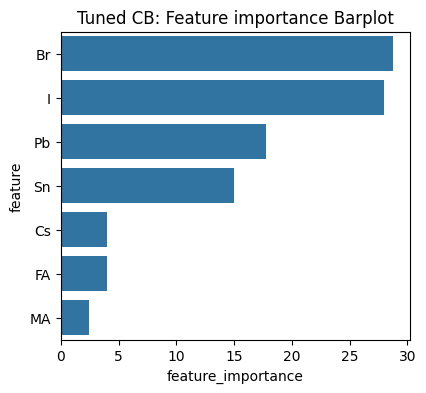

In [ ]:
feature_importance = best_cb.get_feature_importance()
feature_names = list(dfx.columns)
num_features = len(feature_names)
dic = {'feature': feature_names, 'feature_importance': feature_importance}

# Create a DataFrame with the feature importances
df_fi = pd.DataFrame(dic)
df_fi = df_fi.sort_values('feature_importance', ascending=False).reset_index(drop=True)

# Plot the top 30 feature importances
plt.figure(figsize=(4.5, 4))
sns.barplot(data=df_fi.head(30), x='feature_importance', y='feature')
plt.title('Tuned CB: Feature importance Barplot')
plt.savefig('Tuned CB: Feature importance Barplot.png')
plt.show()


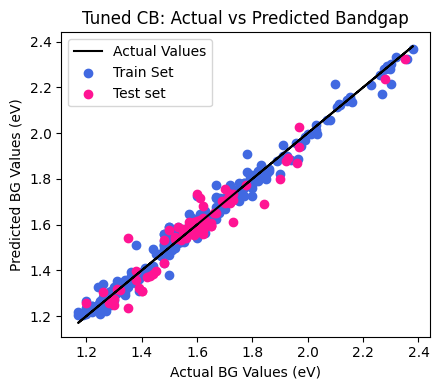

In [ ]:
# Plotting the results for the training set
y_train_pred_n4 = best_cb.predict(X_train4)
plt.figure(figsize=(4.5, 4))
plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred_n4, color='royalblue', label='Train Set')
plt.scatter(y_test4, y_pred_n4, color='deeppink', label='Test set')

plt.xlabel('Actual BG Values (eV)')
plt.ylabel('Predicted BG Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned CB: Actual vs Predicted Bandgap')
plt.savefig('Tuned CB: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

#SHAP Analysis

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.8 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
dfx.shape

(551, 7)

In [ ]:
col=dfx.columns
dfx_test = pd.DataFrame(data=X_train4, columns=col)

In [ ]:
explainer=shap.Explainer(best_cb)
shap_values=explainer(dfx_test[0:500])

In [ ]:
np.shape(shap_values.values)

(468, 7)

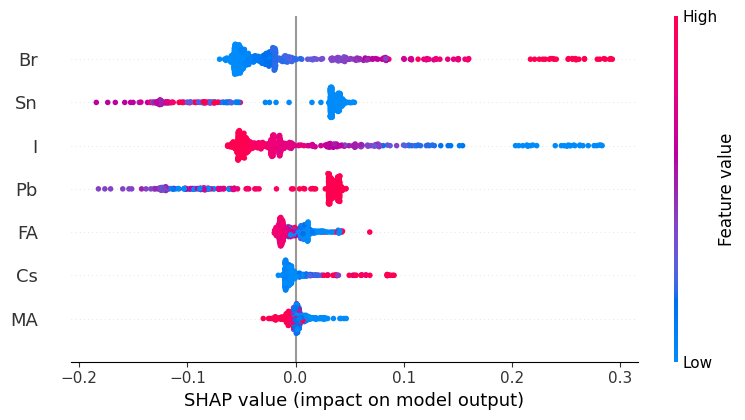

In [ ]:
plt.figure(figsize=(10, 3))
shap.summary_plot(shap_values)
plt.show()

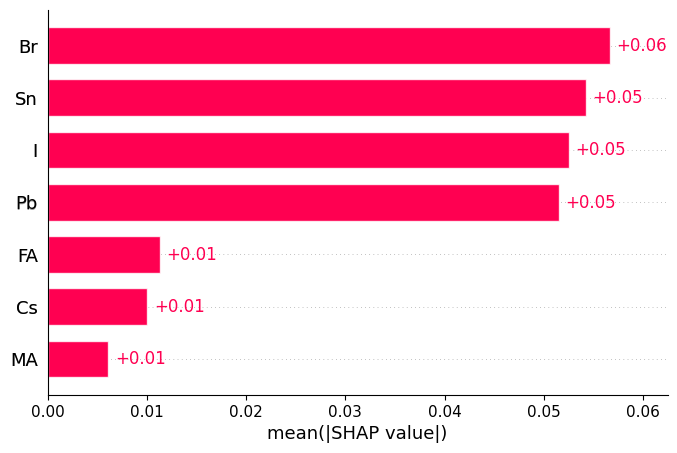

In [ ]:
plt.figure(figsize=(5, 3))
shap.plots.bar(shap_values)
plt.show()